In [1]:
import os
from os.path import join, basename
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(color_codes=True, style="white")

## parameters and load data

In [2]:
folder_save = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-in-HOPS_condensates/paper_figure_plots/condensate_properties"
os.chdir(folder_save)
color_1x = "#4D5D53"
color_2x = "#856088"

labels_1x = []
labels_2x = []
files_1x = []
files_2x = []
for f in os.listdir("all_HILO_spots_1x"):
    if f.endswith(".csv"):
        files_1x.append(join("all_HILO_spots_1x", f))
        labels_1x.append("HILO")

for f in os.listdir("all_HILO_spots_2x"):
    if f.endswith(".csv"):
        files_2x.append(join("all_HILO_spots_2x", f))
        labels_2x.append("HILO")

for f in os.listdir("all_spindisk_spots_1x"):
    if f.endswith(".csv"):
        files_1x.append(join("all_spindisk_spots_1x", f))
        labels_1x.append("spindisk")

for f in os.listdir("all_spindisk_spots_2x"):
    if f.endswith(".csv"):
        files_2x.append(join("all_spindisk_spots_2x", f))
        labels_2x.append("spindisk")

In [3]:
def robust_normalize(arr):
    median = np.median(arr)
    q1 = np.percentile(arr, 25)
    q3 = np.percentile(arr, 75)
    iqr = q3 - q1
    normalized_arr = (arr - median) / iqr + 1
    return normalized_arr


lst_df = []
for f, label in zip(files_1x, labels_1x):
    df = pd.read_csv(f, usecols=["meanIntensity"])
    df["meanInt_norm"] = robust_normalize(df["meanIntensity"].to_numpy(float))
    df["microscope"] = np.repeat(label, df.shape[0])
    df["filename"] = np.repeat(basename(f), df.shape[0])
    lst_df.append(df)
df_1x = pd.concat(lst_df, ignore_index=True)
df_1x["label"] = np.repeat("isotonic", df_1x.shape[0])

lst_df = []
for f, label in zip(files_2x, labels_2x):
    df = pd.read_csv(f, usecols=["meanIntensity"])
    df["meanInt_norm"] = robust_normalize(df["meanIntensity"].to_numpy(float))
    df["microscope"] = np.repeat(label, df.shape[0])
    df["filename"] = np.repeat(basename(f), df.shape[0])
    lst_df.append(df)
df_2x = pd.concat(lst_df, ignore_index=True)
df_2x["label"] = np.repeat("hypertonic", df_2x.shape[0])

df_toplot = pd.concat([df_1x, df_2x], ignore_index=True)

## spots stats

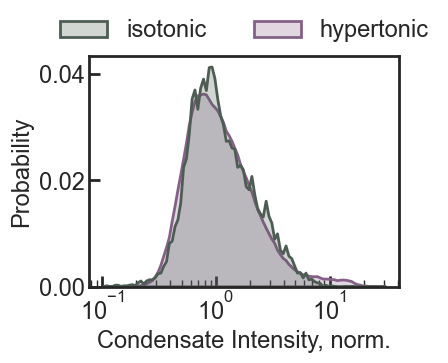

In [4]:
fontsize = 17
plt.figure(figsize=(4, 3))
ax = sns.histplot(
    data=df_toplot[df_toplot["meanInt_norm"] > 0],
    x="meanInt_norm",
    hue="label",
    stat="probability",
    hue_order=["isotonic", "hypertonic"],
    palette=[color_1x, color_2x],
    bins=100,
    binrange=(-1, 1.5),
    common_norm=False,
    element="poly",
    # fill=False,
    log_scale=True,
    lw=2,
)
# other settings
sns.move_legend(
    ax,
    "upper center",
    frameon=False,
    title=None,
    fontsize=fontsize,
    bbox_to_anchor=(0.5, 1.25),
    ncol=2,
)
plt.ylabel("Probability", fontsize=fontsize)
plt.xlabel("Condensate Intensity, norm.", fontsize=fontsize)
plt.gca().spines[:].set_linewidth(2)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=fontsize,
    direction="in",
    bottom=True,
    left=True,
    length=8,
    width=2,
)
plt.gca().tick_params(
    axis="x",
    which="minor",
    direction="in",
    bottom=True,
    length=5,
    width=1,
)
plt.savefig(
    "hist_spots_meanInt_norm_PBvsHOPS.png",
    format="png",
    bbox_inches="tight",
    dpi=300,
)

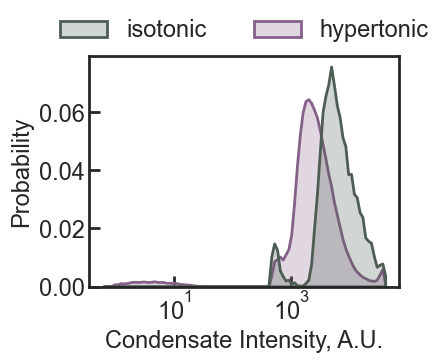

In [5]:
fontsize = 17
plt.figure(figsize=(4, 3))
ax = sns.histplot(
    data=df_toplot[df_toplot["meanIntensity"] > 0],
    x="meanIntensity",
    hue="label",
    stat="probability",
    hue_order=["isotonic", "hypertonic"],
    palette=[color_1x, color_2x],
    bins=100,
    # binrange=(2.5, 3.3),
    common_norm=False,
    element="poly",
    # fill=False,
    log_scale=True,
    lw=2,
)
# other settings
sns.move_legend(
    ax,
    "upper center",
    frameon=False,
    title=None,
    fontsize=fontsize,
    bbox_to_anchor=(0.5, 1.25),
    ncol=2,
)
plt.ylabel("Probability", fontsize=fontsize)
plt.xlabel("Condensate Intensity, A.U.", fontsize=fontsize)
plt.gca().spines[:].set_linewidth(2)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=fontsize,
    direction="in",
    bottom=True,
    left=True,
    length=8,
    width=2,
)
plt.gca().tick_params(
    axis="x",
    which="minor",
    direction="in",
    bottom=True,
    length=5,
    width=1,
)
plt.savefig(
    "hist_spots_meanInt_PBvsHOPS.png",
    format="png",
    bbox_inches="tight",
    dpi=300,
)

## HILO vs spinning disk

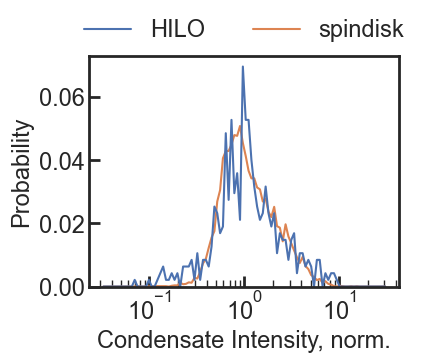

In [13]:
fontsize = 17
plt.figure(figsize=(4, 3))
ax = sns.histplot(
    data=df_1x[df_1x["meanInt_norm"] > 0],
    x="meanInt_norm",
    hue="microscope",
    # legend=False,
    stat="probability",
    # palette=[color_1x],
    bins=100,
    binrange=(-1.5, 1.5),
    common_norm=False,
    element="poly",
    fill=False,
    log_scale=True,
)
# other settings
sns.move_legend(
    ax,
    "upper center",
    frameon=False,
    title=None,
    fontsize=fontsize,
    bbox_to_anchor=(0.5, 1.25),
    ncol=2,
)
plt.ylabel("Probability", fontsize=fontsize)
plt.xlabel("Condensate Intensity, norm.", fontsize=fontsize)
plt.gca().spines[:].set_linewidth(2)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=fontsize,
    direction="in",
    bottom=True,
    left=True,
    length=8,
    width=2,
)
plt.gca().tick_params(
    axis="x",
    which="minor",
    direction="in",
    bottom=True,
    length=5,
    width=1,
)
plt.savefig(
    "hist_spots_meanInt_PB_HILOvsDisk.png",
    format="png",
    bbox_inches="tight",
    dpi=300,
)

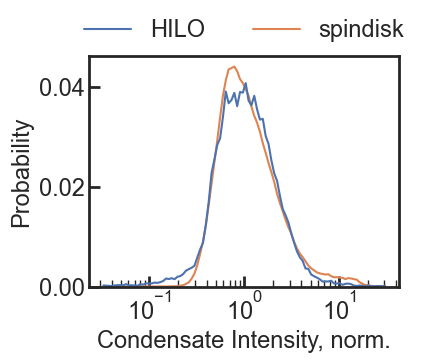

In [14]:
fontsize = 17
plt.figure(figsize=(4, 3))
ax = sns.histplot(
    data=df_2x[df_2x["meanInt_norm"] > 0],
    x="meanInt_norm",
    hue="microscope",
    # legend=False,
    stat="probability",
    # palette=[color_1x],
    bins=100,
    binrange=(-1.5, 1.5),
    common_norm=False,
    element="poly",
    fill=False,
    log_scale=True,
)
# other settings
sns.move_legend(
    ax,
    "upper center",
    frameon=False,
    title=None,
    fontsize=fontsize,
    bbox_to_anchor=(0.5, 1.25),
    ncol=2,
)
plt.ylabel("Probability", fontsize=fontsize)
plt.xlabel("Condensate Intensity, norm.", fontsize=fontsize)
plt.gca().spines[:].set_linewidth(2)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=fontsize,
    direction="in",
    bottom=True,
    left=True,
    length=8,
    width=2,
)
plt.gca().tick_params(
    axis="x",
    which="minor",
    direction="in",
    bottom=True,
    length=5,
    width=1,
)
plt.savefig(
    "hist_spots_meanInt_HOPS_HILOvsDisk.png",
    format="png",
    bbox_inches="tight",
    dpi=300,
)